In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import pickle

In [5]:
def cal_undistort(img, objpoints, imgpoints):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
        objpoints, imgpoints, gray.shape[::-1], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist, mtx, dist

In [6]:
def collect_callibration_points():
    objpoints = []
    imgpoints = []

    images = glob.glob('./checkerboards_cal/Checkerboard_*.jpeg')
    objp = np.zeros((8*6, 3), np.float32)
    objp[:, :2] = np.mgrid[0:8, 0:6].T.reshape(-1, 2)
    
    for fname in images:
        img = mpimg.imread(fname) #[::-1,:,::-1]
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, (8, 6), None)

        if ret is True:
            imgpoints.append(corners)
            objpoints.append(objp)

    return imgpoints, objpoints

In [7]:
objp = np.zeros((8*6, 3), np.float32)
#np.mgrid[0:8, 0:6].T.reshape(-1,2)


In [8]:
def compare_images(image1, image2, image1_exp="Image 1", image2_exp="Image 2"):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(image1)
    ax1.set_title(image1_exp, fontsize=50)
    ax2.imshow(image2)
    ax2.set_title(image2_exp, fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()

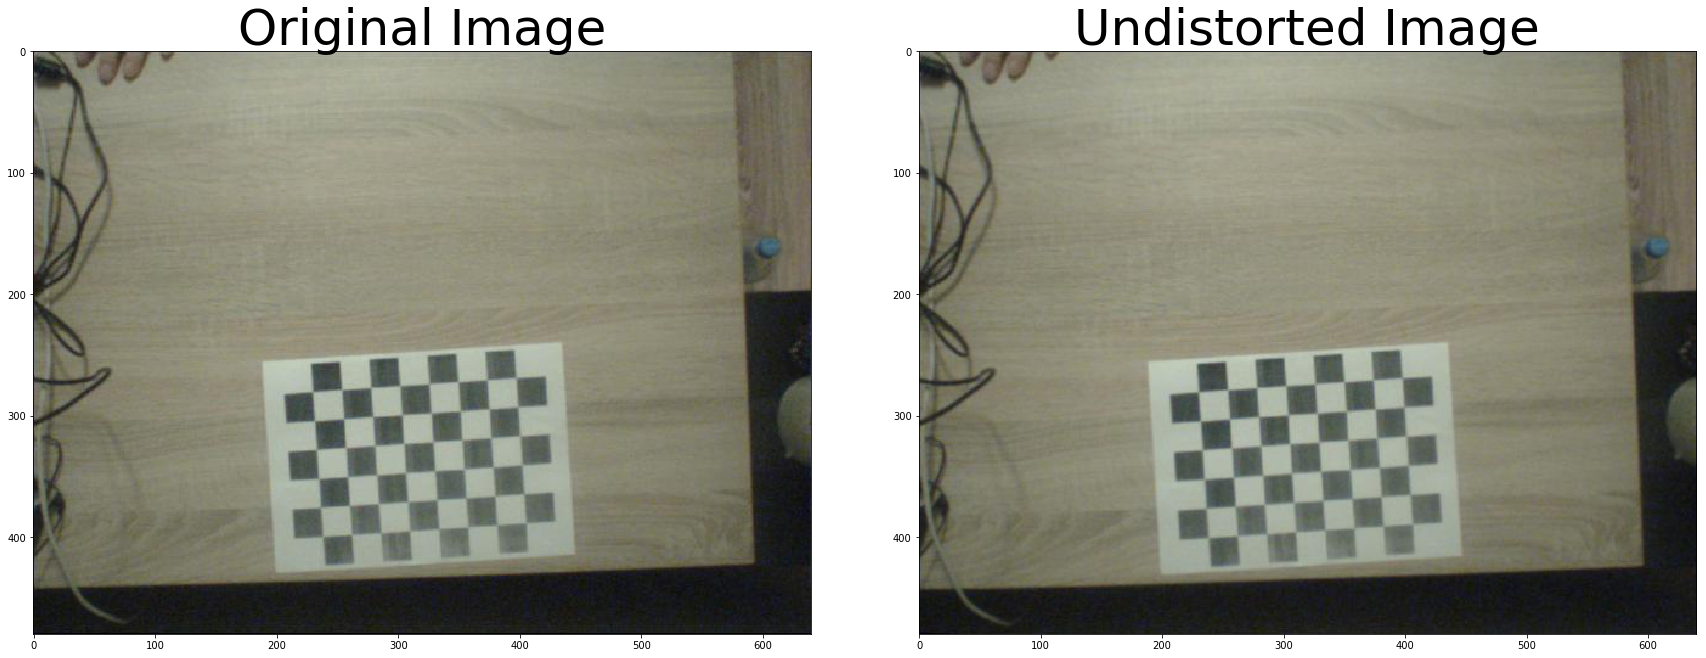

In [9]:
# CameraCalibration
imgpoints, objpoints = collect_callibration_points()
img = mpimg.imread('./checkerboards_cal/Checkerboard_20181118_212105.jpeg')
undistorted, cameraMatrix, distCoeffs = cal_undistort(img,
                                                    objpoints,
                                                    imgpoints)
compare_images(img, undistorted, "Original Image", "Undistorted Image")

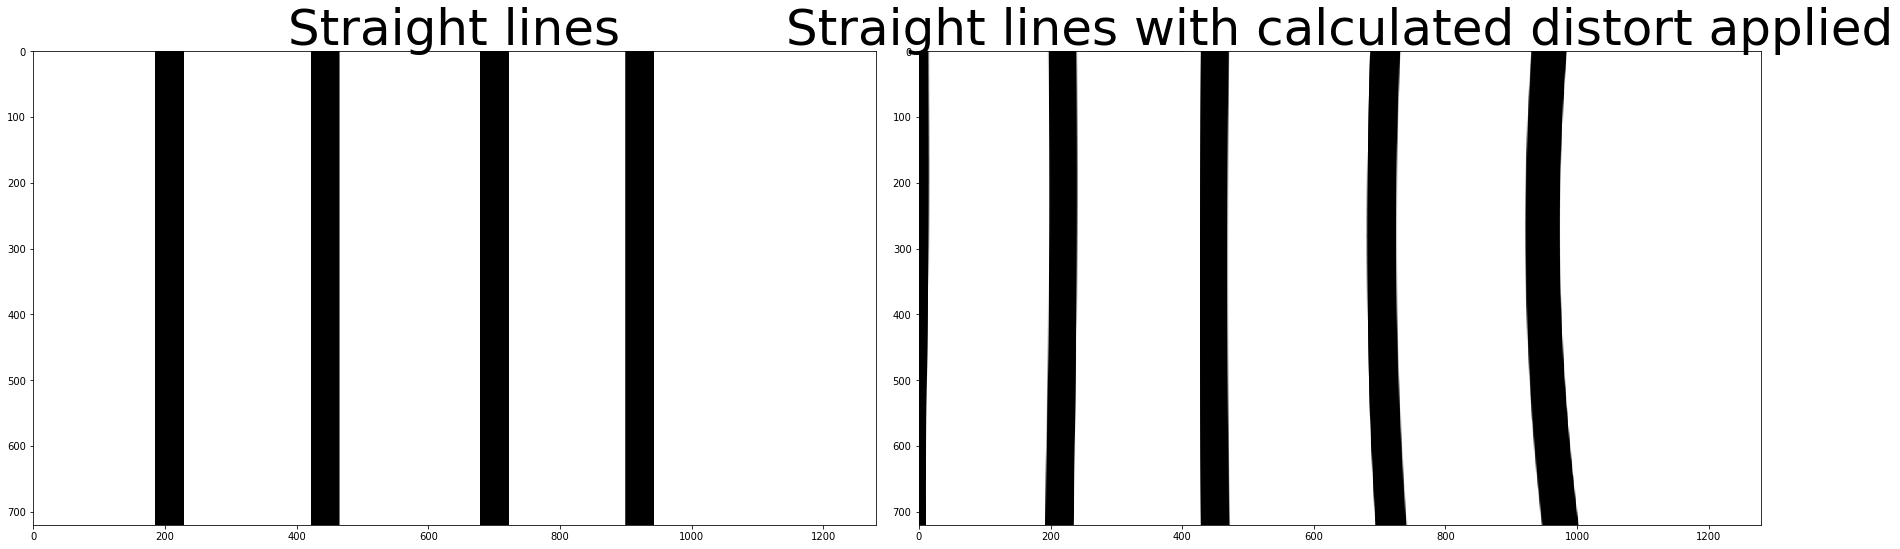

In [92]:
image_path = './straight_lines1.jpg'
image1 = mpimg.imread(image_path)
image2, mtx, dist_coefficients = cal_undistort(image, objpoints, imgpoints)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image1)
ax1.set_title('Straight lines', fontsize=50)
ax2.imshow(image2)
ax2.set_title('Straight lines with calculated distort applied', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

In [13]:
# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = cameraMatrix,
dist_pickle["dist"] = distCoeffs,
dist_pickle['objpoints'] = objpoints
dist_pickle['imgpoints'] = imgpoints
pickle.dump( dist_pickle, open('./cam_calibration_data.p', 'wb') )

In [16]:
cameraMatrix

array([[2.21190685e+03, 0.00000000e+00, 3.28922080e+02],
       [0.00000000e+00, 2.21431413e+03, 2.06185061e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])